In [ ]:
#generative adversial networks
#unique
#train a gan >>>> discriminator and generator
#cifar 10


In [1]:
#load libraries
from tensorflow.keras.datasets.cifar10 import load_data
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, LeakyReLU

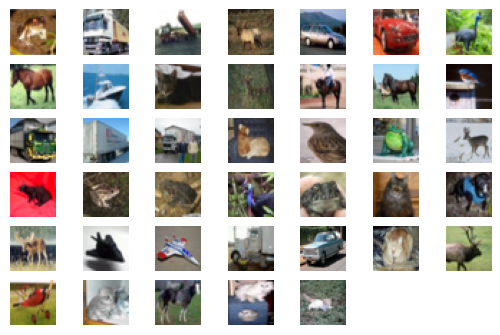

In [2]:
(x_train,y_train),(x_test,y_test) = load_data()
#plot images
for i in range(40):
    plt.subplot(7,7,i+1)
    plt.axis('off')
    plt.imshow(x_train[i])
plt.show()    

In [3]:
x_train[0].shape

(32, 32, 3)

In [4]:
#discriminator

def define_discriminator(input_shape = (32,32,3)):
    model = Sequential()
    #64 filters and each filter has a shape of 3*3
    model.add(Conv2D(64,(3,3),padding = "same", input_shape = input_shape ))
    model.add(LeakyReLU(alpha = 0.2))    #activation function
     
    #Pooling layer
    #downsampling  >>> reduces the resolution image, pooling, strides
    model.add(Conv2D(128,(3,3),padding = "same",strides = (2,2)))
    model.add(LeakyReLU(alpha = 0.2)) 
    #downsample
    model.add(Conv2D(128,(3,3),padding = "same",strides = (2,2)))
    model.add(LeakyReLU(alpha = 0.2)) 
    #downsample
    model.add(Conv2D(256,(3,3),padding = "same",strides = (2,2)))
    model.add(LeakyReLU(alpha = 0.2)) 
    
    
    #classification layers
    model.add(Flatten())
    model.add(Dropout(0.4))   #randomly
    model.add(Dense(1,activation = "sigmoid"))
    model.compile(loss = "binary_crossentropy",
                  optimizer = Adam(learning_rate = 0.0001),metrics = ["accuracy"])
    
    return model
    

In [5]:
model = define_discriminator()
model.summary()

/Users/mordhwaj/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(
/Users/mordhwaj/anaconda3/lib/python3.11/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │         4,097 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 522,497 (1.99 MB)

 Trainable params: 522,497 (1.99 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [11]:
plot_model(model,show_shapes = True, show_layer_names = True)

AttributeError: module 'pydot' has no attribute 'InvocationException'

In [12]:
#filter to identify one segment of any image
#german shephered>>>>
#image matrix * filter matrix

#Leaky ReLU is an extension of the ReLU activation function.
# It is similar to ReLU, but instead of returning zero for negative inputs, 
# it returns a small negative value. This helps to avoid the "dying ReLU" problem, 
# where some neurons can become permanently inactive during training.

In [8]:
#load the data
#and prepare training images
#x_train ,
def load_real_samples():
    (x_train,_),(_,_) = load_data()
    #int to float >>> better performance of algo with float data
    x = x_train.astype("float32")
    #scaling data  [0,255]    to  [-1,1]
    x = (x-127.5) / 127.5
    return x
    


In [9]:
x = load_real_samples()
x.shape

(50000, 32, 32, 3)

In [10]:
#generate the real samples
#real->1 fake->0
def generate_real_samples(data, n):   #data = 100 n= 30
    #choose randomly the instances
    ri = np.random.randint(0,data.shape[0],n)
    x = data[ri]
    
    #generate class labels
    y = np.ones((n,1))
    return x, y
    
    

In [11]:
np.ones((30,1))

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [12]:
generate_real_samples

<function __main__.generate_real_samples(data, n)>

In [39]:
# x,y= generate_real_samples(x,64)
# print(x.shape,y.shape)

In [13]:
(50000,32,32,3)

(50000, 32, 32, 3)

In [14]:
30*32*32*3

92160

In [15]:
def generate_fake_samples(n):
    x = np.random.rand(32*32*3*n)
    #update to have a range [-1,1]
    x = -1 + x*2
    x = x.reshape((n,32,32,3))
    #class labels for fake data
    y = np.zeros((n,1))
    return x,y

In [16]:
x , y = generate_fake_samples(64)

In [17]:
x.shape

(64, 32, 32, 3)

In [45]:
# import matplotlib.pyplot as plt
# plt.imshow(x[2])    #noise

In [18]:
def train_discriminator(model,dataset,n_iter = 30, batch_size = 128):
    half_batch = int(batch_size/2)
    for i in range(n_iter):
        x_real, y_real  = generate_real_samples(dataset,half_batch)
        #train on real samples>
        _,real_acc =model.train_on_batch(x_real,y_real)

        x_fake,y_fake =generate_fake_samples(half_batch)
        _,fake_acc =model.train_on_batch(x_fake,y_fake)

        print(" real = {} fake = {} ".format(real_acc*100,fake_acc*100))



In [19]:
model = define_discriminator()
dataset = load_real_samples()
train_discriminator(model,dataset)

 real = 12.5 fake = 31.25 
 real = 39.0625 fake = 44.140625 
 real = 51.249998807907104 fake = 52.60416865348816 
 real = 57.14285969734192 fake = 59.375 
 real = 61.11111044883728 fake = 63.90625238418579 
 real = 65.76704382896423 fake = 68.359375 
 real = 69.35096383094788 fake = 71.54017686843872 
 real = 71.97916507720947 fake = 73.6328125 
 real = 74.17279481887817 fake = 75.60763955116272 
 real = 75.57565569877625 fake = 76.79687738418579 
 real = 76.63690447807312 fake = 77.69886255264282 
 real = 77.6494562625885 fake = 78.58073115348816 
 real = 78.81249785423279 fake = 79.62740659713745 
 real = 79.22453880310059 fake = 79.96651530265808 
 real = 80.22629022598267 fake = 80.88541626930237 
 real = 80.6955635547638 fake = 81.298828125 
 real = 81.34469985961914 fake = 81.89338445663452 
 real = 81.87500238418579 fake = 82.37847089767456 
 real = 82.05236196517944 fake = 82.52466917037964 
 real = 82.41186141967773 fake = 82.85156488418579 
 real = 82.88872241973877 fake = 83

In [21]:
from tensorflow.keras.layers import Conv2DTranspose, Reshape

In [22]:
#generator
def define_generator(latent_dim):
    model = Sequential()
    model.add(Dense(256*4*4,input_dim = latent_dim))
    model.add(LeakyReLU(alpha = 0.2))
    model.add((Reshape((4,4,256))))
    
    #upsampling 8*8
    model.add(Conv2DTranspose(128,(4,4),strides = (2,2),padding = "same"))
    model.add(LeakyReLU(alpha = 0.2))
    
     #upsampling 16*16
    model.add(Conv2DTranspose(128,(4,4),strides = (2,2),padding = "same"))
    model.add(LeakyReLU(alpha = 0.2))
    
     #upsampling 32*32
    model.add(Conv2DTranspose(128,(4,4),strides = (2,2),padding = "same"))
    model.add(LeakyReLU(alpha = 0.2))
    
    #output_layer
    model.add(Conv2D(3,(3,3),activation = "tanh",padding = "same"))
    
    return model
    
    
    

In [23]:
latent_dim = 100
model = define_generator(latent_dim)
model.summary()

/Users/mordhwaj/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 4096)           │       413,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_8 (LeakyReLU)       │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 8, 8, 128)      │       524,416 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_9 (LeakyReLU)       │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 16, 16, 128)    │       262,272 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_10 (LeakyReLU)      │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_2              │ (None, 32, 32, 128)    │       262,272 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_11 (LeakyReLU)      │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 32, 32, 3)      │         3,459 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,466,115 (5.59 MB)

 Trainable params: 1,466,115 (5.59 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
#
def generate_latent_points(latent_dim,n):  #n = rows latent_dim=columns (2,3) = 6
   x_input =  np.random.randn(latent_dim*n)
   x_input = x_input.reshape(n,latent_dim) 
   return x_input 

In [26]:
def generate_fake_samples(g_model,latent_dim,n):
    x_input = generate_latent_points(latent_dim,n)
    
    x = g_model.predict(x_input)
    
    y= np.zeros((n,1))
    return x,y
    

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

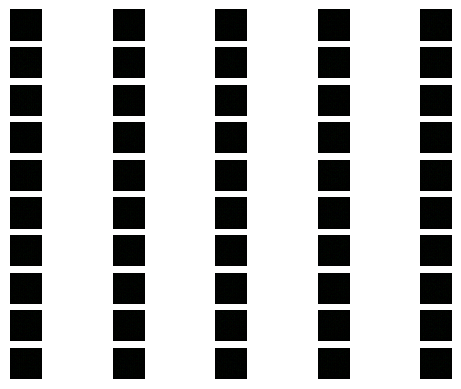

In [27]:
model = define_generator(latent_dim)
n_samples = 50
x,_ = generate_fake_samples(model,latent_dim,n_samples)
for i in range(n_samples):
    plt.subplot(10,5,i+1)
    plt.axis("off")
    plt.imshow(x[i])
plt.show()    

In [55]:
#GANs
#connect the discriminator along with the generator

In [28]:
#GANs
def define_gan(g_model,d_model):
    d_model.trainable = False
    model = Sequential()
    model.add(g_model)
    model.add(d_model)
    model.compile(loss = "binary_crossentropy",
                  optimizer  = Adam(learning_rate =0.0002 ))    
    return model

In [29]:
d_model = define_discriminator()
g_model = define_generator(latent_dim)
gan_model = define_gan(g_model,d_model)
gan_model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_5 (Sequential)       │ ?                      │     1,466,115 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_4 (Sequential)       │ ?                      │       522,497 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,988,612 (7.59 MB)

 Trainable params: 1,466,115 (5.59 MB)

 Non-trainable params: 522,497 (1.99 MB)

In [30]:
dataset.shape[0]/128

390.625

In [31]:
def train(g_model,d_model,gan_model,dataset,latent_dim,n_epochs=200,n_batch = 128):
    batch_per_epoch = int(dataset.shape[0]/n_batch)
    half_batch = int(n_batch/2)
    for i in range(n_epochs):
        for j in range(batch_per_epoch):
            #fetching real data
            x_real, y_real  = generate_real_samples(dataset,half_batch)
            d_loss1, _ =d_model.train_on_batch(x_real,y_real)
            
            
            x_fake,y_fake =generate_fake_samples(g_model,latent_dim,half_batch)#fake samples
            d_loss2,_ = d_model.train_on_batch(x_fake,y_fake)
            x_gan = generate_latent_points(latent_dim,n_batch)  #vector space
            y_gan = np.ones((n_batch,1))
            gan_loss = gan_model.train_on_batch(x_gan,y_gan)
            print(f"epoch: {i+1}/{n_epochs} d1(real): {d_loss1 } d2(fake):{d_loss2}")
            
            if (i+1) %10 ==0:
                summarise_performance(i,g_model,d_model,dataset,latent_dim,half_batch)
            

In [32]:
def summarise_performance(epoch,g_model,d_model,dataset,latent_dim,half_batch):   #10 number of epochs
    x_real,y_real = generate_real_samples(dataset,half_batch)
    _,real_acc=d_model.evaluate(x_real,y_real)
    x_fake,y_fake =generate_fake_samples(g_model,latent_dim,half_batch)#fake samples
    _,fake_acc=d_model.evaluate(x_fake,y_fake)
    print("Accuracy real : %.0f%% Fake : %0.f%%"% (real_acc*100,acc_fake*100))
    save_plot(x_fake,epoch)
    filename = "generator_model%.3d.h5" % (epoch +1)  #0 +1 =001   HDF5 file format
    g_model.save(filename)


In [33]:
def save_plot(samples,epoch , n=7):
    samples = (samples + 1 )/2.0
    for i in range(n*n):
        plt.subplot(n,n,1+i)
        plt.axis("off")
        plt.imshow(samples[i])
    filename = "generated_plot_%03d.png" % (epoch + 1)  
    plt.savefig(filename)
    plt.close()        
    

In [34]:
dataset.shape

(50000, 32, 32, 3)

In [ ]:
train(g_model,d_model,gan_model,dataset,latent_dim)

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step

/Users/mordhwaj/anaconda3/lib/python3.11/site-packages/keras/src/backend/tensorflow/trainer.py:75: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
epoch: 1/200 d1(real): 0.6885943412780762 d2(fake):0.6908962726593018
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
epoch: 1/200 d1(real): 0.6901943683624268 d2(fake):0.6911359429359436
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
epoch: 1/200 d1(real): 0.6905111074447632 d2(fake):0.6912325024604797
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
epoch: 1/200 d1(real): 0.6910128593444824 d2(fake):0.6916412711143494
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
epoch: 1/200 d1(real): 0.6914994120597839 d2(fake):0.6920832395553589
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
epoch: 1/200 d1(real): 0.6917835474014282 d2(fake):0.6924188733100891
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
epoch: 1/200 d1(real): 0.6921182870864868 d2(fake):0.692823588848114
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
epoch: 1/200 d1(real): 0.692566454410553 d2(fake):0.693314254283905
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
epoch: 1/200 d1(real): 0.6931723952293396 d2(fake):0.6940345764160156
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42m

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
epoch: 1/200 d1(real): 0.7810953259468079 d2(fake):0.7834426760673523
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
epoch: 1/200 d1(real): 0.7826561331748962 d2(fake):0.7849332690238953
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
epoch: 1/200 d1(real): 0.7841051816940308 d2(fake):0.7863395810127258
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
epoch: 1/200 d1(real): 0.7855921387672424 d2(fake):0.7877767086029053
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
epoch: 1/200 d1(real): 0.7869997620582581 d2(fake):0.7891327738761902
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
epoch: 1/200 d1(real): 0.7883554697036743 d2(fake):0.7905693054199219
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
epoch: 1/200 d1(real): 0.7897928357124329 d2(fake):0.7919538021087646
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
epoch: 1/200 d1(real): 0.7911514043807983 d2(fake):0.7932429313659668
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
epoch: 1/200 d1(real): 0.7924227118492126 d2(fake):0.7945644855499268
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
epoch: 1/200 d1(real): 0.844487190246582 d2(fake):0.8459782600402832
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
epoch: 1/200 d1(real): 0.8453136086463928 d2(fake):0.8468302488327026
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
epoch: 1/200 d1(real): 0.8461564183235168 d2(fake):0.8476436734199524
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
epoch: 1/200 d1(real): 0.8469691872596741 d2(fake):0.8484354615211487
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
epoch: 1/200 d1(real): 0.8477855324745178 d2(fake):0.8492431640625
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
epoch: 1/200 d1(real): 0.8485981225967407 d2(fake):0.8499811291694641
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
epoch: 1/200 d1(real): 0.8493345975875854 d2(fake):0.8507885932922363
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
epoch: 1/200 d1(real): 0.8501383066177368 d2(fake):0.8515551090240479
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
epoch: 1/200 d1(real): 0.8509054780006409 d2(fake):0.8522878289222717
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
epoch: 1/200 d1(real): 0.8837014436721802 d2(fake):0.8847786784172058
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
epoch: 1/200 d1(real): 0.8842231631278992 d2(fake):0.885327935218811
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
epoch: 1/200 d1(real): 0.8847717642784119 d2(fake):0.8858669400215149
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
epoch: 1/200 d1(real): 0.8853132128715515 d2(fake):0.8864251375198364
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
epoch: 1/200 d1(real): 0.8858683705329895 d2(fake):0.8869639039039612
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
epoch: 1/200 d1(real): 0.8864151835441589 d2(fake):0.8875054121017456
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
epoch: 1/200 d1(real): 0.8869491219520569 d2(fake):0.8880253434181213
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
epoch: 1/200 d1(real): 0.8874802589416504 d2(fake):0.8885566592216492
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
epoch: 1/200 d1(real): 0.88801109790802 d2(fake):0.8890460133552551
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41m

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
epoch: 1/200 d1(real): 0.9104036092758179 d2(fake):0.9112647771835327
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
epoch: 1/200 d1(real): 0.9107914566993713 d2(fake):0.9116531014442444
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
epoch: 1/200 d1(real): 0.9111803770065308 d2(fake):0.9120266437530518
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
epoch: 1/200 d1(real): 0.9115527868270874 d2(fake):0.9123871922492981
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
epoch: 1/200 d1(real): 0.9119113683700562 d2(fake):0.912769615650177
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
epoch: 1/200 d1(real): 0.9123052954673767 d2(fake):0.9131479263305664
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
epoch: 1/200 d1(real): 0.9126842021942139 d2(fake):0.9135220646858215
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
epoch: 1/200 d1(real): 0.9130545854568481 d2(fake):0.9138937592506409
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
epoch: 1/200 d1(real): 0.9134244918823242 d2(fake):0.9142513275146484
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
epoch: 1/200 d1(real): 0.9293914437294006 d2(fake):0.9300760626792908
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
epoch: 1/200 d1(real): 0.9296606183052063 d2(fake):0.9303392171859741
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
epoch: 1/200 d1(real): 0.9299296736717224 d2(fake):0.9306126236915588
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
epoch: 1/200 d1(real): 0.9302037358283997 d2(fake):0.9308865070343018
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
epoch: 1/200 d1(real): 0.9304764866828918 d2(fake):0.9311400055885315
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
epoch: 1/200 d1(real): 0.9307302832603455 d2(fake):0.9314042329788208
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
epoch: 1/200 d1(real): 0.930993914604187 d2(fake):0.9316475987434387
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
epoch: 1/200 d1(real): 0.9312463998794556 d2(fake):0.9319198131561279
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
epoch: 1/200 d1(real): 0.9315112233161926 d2(fake):0.9321836233139038
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
epoch: 1/200 d1(real): 0.9429416656494141 d2(fake):0.9435110092163086
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
epoch: 1/200 d1(real): 0.9431494474411011 d2(fake):0.9437037706375122
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
epoch: 1/200 d1(real): 0.9433426856994629 d2(fake):0.9439100623130798
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
epoch: 1/200 d1(real): 0.9435482025146484 d2(fake):0.9440845251083374
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
epoch: 1/200 d1(real): 0.9437198638916016 d2(fake):0.9442735314369202
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
epoch: 1/200 d1(real): 0.9439117312431335 d2(fake):0.9444719552993774
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
epoch: 1/200 d1(real): 0.9441140294075012 d2(fake):0.9446716904640198
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
epoch: 1/200 d1(real): 0.9443159103393555 d2(fake):0.9448787569999695
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
epoch: 1/200 d1(real): 0.9445201754570007 d2(fake):0.9450699687004089
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
epoch: 2/200 d1(real): 0.9531620740890503 d2(fake):0.9536258578300476
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
epoch: 2/200 d1(real): 0.9532982110977173 d2(fake):0.9537690877914429
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
epoch: 2/200 d1(real): 0.953447163105011 d2(fake):0.9539315104484558
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
epoch: 2/200 d1(real): 0.9536117911338806 d2(fake):0.9540932178497314
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
epoch: 2/200 d1(real): 0.9537693858146667 d2(fake):0.9542394280433655
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
epoch: 2/200 d1(real): 0.9539135098457336 d2(fake):0.954391598701477
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
epoch: 2/200 d1(real): 0.9540720582008362 d2(fake):0.9545430541038513
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
epoch: 2/200 d1(real): 0.9542216658592224 d2(fake):0.9546946883201599
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
epoch: 2/200 d1(real): 0.9543740749359131 d2(fake):0.9548361897468567
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
epoch: 2/200 d1(real): 0.9610722661018372 d2(fake):0.9614849090576172
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
epoch: 2/200 d1(real): 0.9611952304840088 d2(fake):0.9616110324859619
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
epoch: 2/200 d1(real): 0.9613223075866699 d2(fake):0.9617330431938171
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
epoch: 2/200 d1(real): 0.9614422917366028 d2(fake):0.9618592262268066
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
epoch: 2/200 d1(real): 0.9615672826766968 d2(fake):0.9619718194007874
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
epoch: 2/200 d1(real): 0.961682915687561 d2(fake):0.9620816707611084
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
epoch: 2/200 d1(real): 0.9617909789085388 d2(fake):0.9622101187705994
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
epoch: 2/200 d1(real): 0.9619208574295044 d2(fake):0.9623235464096069
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
epoch: 2/200 d1(real): 0.9620330929756165 d2(fake):0.9624342322349548
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
epoch: 2/200 d1(real): 0.9673076868057251 d2(fake):0.9676717519760132
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
epoch: 2/200 d1(real): 0.9674074053764343 d2(fake):0.9677706956863403
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
epoch: 2/200 d1(real): 0.9675024747848511 d2(fake):0.9678611755371094
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
epoch: 2/200 d1(real): 0.9675965309143066 d2(fake):0.9679468870162964
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
epoch: 2/200 d1(real): 0.9676854014396667 d2(fake):0.9680416584014893
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
epoch: 2/200 d1(real): 0.9677777290344238 d2(fake):0.9681351780891418
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
epoch: 2/200 d1(real): 0.9678726196289062 d2(fake):0.9682170748710632
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
epoch: 2/200 d1(real): 0.9679562449455261 d2(fake):0.9683120250701904
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
epoch: 2/200 d1(real): 0.9680507183074951 d2(fake):0.9684075713157654
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
epoch: 2/200 d1(real): 0.972359836101532 d2(fake):0.9726912379264832
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
epoch: 2/200 d1(real): 0.9724478721618652 d2(fake):0.9727752804756165
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
epoch: 2/200 d1(real): 0.972533106803894 d2(fake):0.9728580713272095
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
epoch: 2/200 d1(real): 0.9726133346557617 d2(fake):0.972930371761322
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
epoch: 2/200 d1(real): 0.9726890325546265 d2(fake):0.9730098247528076
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
epoch: 2/200 d1(real): 0.9727702140808105 d2(fake):0.9730938076972961
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
epoch: 2/200 d1(real): 0.9728536605834961 d2(fake):0.9731622934341431
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
epoch: 2/200 d1(real): 0.9729219079017639 d2(fake):0.973243236541748
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
epoch: 2/200 d1(real): 0.9729998707771301 d2(fake):0.9733107686042786
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
epoch: 2/200 d1(real): 0.9767160415649414 d2(fake):0.9770129323005676
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
epoch: 2/200 d1(real): 0.9767864346504211 d2(fake):0.9770749807357788
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
epoch: 2/200 d1(real): 0.9768503904342651 d2(fake):0.977145791053772
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
epoch: 2/200 d1(real): 0.9769209027290344 d2(fake):0.9772164821624756
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
epoch: 2/200 d1(real): 0.9769911170005798 d2(fake):0.9772732853889465
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
epoch: 2/200 d1(real): 0.9770492911338806 d2(fake):0.9773402214050293
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
epoch: 2/200 d1(real): 0.9771151542663574 d2(fake):0.9774072170257568
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
epoch: 2/200 d1(real): 0.9771822094917297 d2(fake):0.9774695038795471
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
epoch: 2/200 d1(real): 0.9772471785545349 d2(fake):0.9775287508964539
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
epoch: 2/200 d1(real): 0.9803454279899597 d2(fake):0.9806060791015625
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
epoch: 2/200 d1(real): 0.9803984761238098 d2(fake):0.9806658625602722
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
epoch: 2/200 d1(real): 0.980456531047821 d2(fake):0.9807191491127014
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
epoch: 2/200 d1(real): 0.9805127382278442 d2(fake):0.9807751178741455
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
epoch: 2/200 d1(real): 0.9805683493614197 d2(fake):0.9808364510536194
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
epoch: 2/200 d1(real): 0.98062664270401 d2(fake):0.980884850025177
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
epoch: 2/200 d1(real): 0.9806779623031616 d2(fake):0.9809432029724121
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
epoch: 2/200 d1(real): 0.9807351231575012 d2(fake):0.980991780757904
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
epoch: 2/200 d1(real): 0.9807831645011902 d2(fake):0.9810450077056885
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
epoch: 2/200 d1(real): 0.9834546446800232 d2(fake):0.983698844909668
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
epoch: 2/200 d1(real): 0.9835047721862793 d2(fake):0.9837533235549927
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
epoch: 2/200 d1(real): 0.9835599064826965 d2(fake):0.9838114380836487
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
epoch: 2/200 d1(real): 0.9836171269416809 d2(fake):0.9838644862174988
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
epoch: 2/200 d1(real): 0.9836704730987549 d2(fake):0.9839155673980713
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
epoch: 2/200 d1(real): 0.9837207198143005 d2(fake):0.9839611053466797
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
epoch: 2/200 d1(real): 0.9837673902511597 d2(fake):0.9840101003646851
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
epoch: 2/200 d1(real): 0.9838147163391113 d2(fake):0.9840582609176636
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
epoch: 2/200 d1(real): 0.9838640689849854 d2(fake):0.9841025471687317
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
epoch: 3/200 d1(real): 0.9861425757408142 d2(fake):0.9863649606704712
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
epoch: 3/200 d1(real): 0.9861844182014465 d2(fake):0.9864082336425781
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
epoch: 3/200 d1(real): 0.9862258434295654 d2(fake):0.9864490628242493
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
epoch: 3/200 d1(real): 0.9862667322158813 d2(fake):0.9865002632141113
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
epoch: 3/200 d1(real): 0.9863184094429016 d2(fake):0.986545205116272
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
epoch: 3/200 d1(real): 0.9863632321357727 d2(fake):0.9865835309028625
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
epoch: 3/200 d1(real): 0.98640376329422 d2(fake):0.9866285920143127
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
epoch: 3/200 d1(real): 0.9864456653594971 d2(fake):0.9866687059402466
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
epoch: 3/200 d1(real): 0.9864888787269592 d2(fake):0.9867172241210938
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40m

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
epoch: 3/200 d1(real): 0.9885675311088562 d2(fake):0.9887779951095581
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
epoch: 3/200 d1(real): 0.9886071085929871 d2(fake):0.9888162016868591
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
epoch: 3/200 d1(real): 0.9886451363563538 d2(fake):0.9888560175895691
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
epoch: 3/200 d1(real): 0.9886851906776428 d2(fake):0.9888997077941895
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
epoch: 3/200 d1(real): 0.9887281656265259 d2(fake):0.9889436960220337
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
epoch: 3/200 d1(real): 0.9887721538543701 d2(fake):0.9889833927154541
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
epoch: 3/200 d1(real): 0.988812267780304 d2(fake):0.9890231490135193
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
epoch: 3/200 d1(real): 0.9888538122177124 d2(fake):0.9890708327293396
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
epoch: 3/200 d1(real): 0.9889000058174133 d2(fake):0.9891108870506287
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
epoch: 3/200 d1(real): 0.990713357925415 d2(fake):0.9909014105796814
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
epoch: 3/200 d1(real): 0.9907392263412476 d2(fake):0.9909393787384033
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
epoch: 3/200 d1(real): 0.9907763004302979 d2(fake):0.9909732937812805
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
epoch: 3/200 d1(real): 0.9908116459846497 d2(fake):0.9910125136375427
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
epoch: 3/200 d1(real): 0.9908514022827148 d2(fake):0.991047739982605
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
epoch: 3/200 d1(real): 0.9908856749534607 d2(fake):0.99107825756073
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
epoch: 3/200 d1(real): 0.9909176826477051 d2(fake):0.9911113381385803
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
epoch: 3/200 d1(real): 0.9909501075744629 d2(fake):0.9911472201347351
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
epoch: 3/200 d1(real): 0.9909862875938416 d2(fake):0.9911823868751526
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
epoch: 3/200 d1(real): 0.9926134347915649 d2(fake):0.9927992820739746
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
epoch: 3/200 d1(real): 0.992643415927887 d2(fake):0.9928240180015564
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
epoch: 3/200 d1(real): 0.9926712512969971 d2(fake):0.9928540587425232
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
epoch: 3/200 d1(real): 0.9927003979682922 d2(fake):0.9928863048553467
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
epoch: 3/200 d1(real): 0.992733895778656 d2(fake):0.9929234981536865
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
epoch: 3/200 d1(real): 0.9927703738212585 d2(fake):0.9929540157318115
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
epoch: 3/200 d1(real): 0.9928005337715149 d2(fake):0.9929879903793335
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
epoch: 3/200 d1(real): 0.9928345084190369 d2(fake):0.9930203557014465
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
epoch: 3/200 d1(real): 0.9928691387176514 d2(fake):0.993049681186676
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39m

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
epoch: 3/200 d1(real): 0.9943464398384094 d2(fake):0.9945161938667297
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
epoch: 3/200 d1(real): 0.9943706393241882 d2(fake):0.9945412874221802
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
epoch: 3/200 d1(real): 0.9943947792053223 d2(fake):0.9945723414421082
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
epoch: 3/200 d1(real): 0.994426965713501 d2(fake):0.9946008324623108
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
epoch: 3/200 d1(real): 0.9944570660591125 d2(fake):0.9946329593658447
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
epoch: 3/200 d1(real): 0.9944862127304077 d2(fake):0.994662880897522
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
epoch: 3/200 d1(real): 0.9945175647735596 d2(fake):0.9946944117546082
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
epoch: 3/200 d1(real): 0.9945487976074219 d2(fake):0.9947232604026794
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
epoch: 3/200 d1(real): 0.9945780038833618 d2(fake):0.9947485327720642
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
epoch: 3/200 d1(real): 0.9959060549736023 d2(fake):0.9960752725601196
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
epoch: 3/200 d1(real): 0.9959378838539124 d2(fake):0.9960977435112
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
epoch: 3/200 d1(real): 0.9959588050842285 d2(fake):0.9961245656013489
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
epoch: 3/200 d1(real): 0.9959868788719177 d2(fake):0.9961536526679993
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
epoch: 3/200 d1(real): 0.9960156679153442 d2(fake):0.9961828589439392
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
epoch: 3/200 d1(real): 0.9960442781448364 d2(fake):0.9962111115455627
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
epoch: 3/200 d1(real): 0.9960719347000122 d2(fake):0.9962310194969177
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
epoch: 3/200 d1(real): 0.9960922002792358 d2(fake):0.9962565302848816
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
epoch: 3/200 d1(real): 0.9961189031600952 d2(fake):0.9962814450263977
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39m

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
epoch: 3/200 d1(real): 0.9973114132881165 d2(fake):0.9974675178527832
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
epoch: 3/200 d1(real): 0.9973351359367371 d2(fake):0.9974891543388367
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
epoch: 3/200 d1(real): 0.9973564743995667 d2(fake):0.9975104331970215
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
epoch: 3/200 d1(real): 0.9973772764205933 d2(fake):0.9975292086601257
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
epoch: 3/200 d1(real): 0.9973965287208557 d2(fake):0.9975571036338806
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
epoch: 3/200 d1(real): 0.9974244236946106 d2(fake):0.9975764751434326
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
epoch: 3/200 d1(real): 0.9974429607391357 d2(fake):0.9976016879081726
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
epoch: 3/200 d1(real): 0.9974699020385742 d2(fake):0.9976222515106201
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
epoch: 3/200 d1(real): 0.9974897503852844 d2(fake):0.9976438283920288
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
epoch: 4/200 d1(real): 0.9985953569412231 d2(fake):0.9987448453903198
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
epoch: 4/200 d1(real): 0.9986186623573303 d2(fake):0.9987608790397644
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
epoch: 4/200 d1(real): 0.9986346960067749 d2(fake):0.9987837076187134
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
epoch: 4/200 d1(real): 0.9986586570739746 d2(fake):0.998810887336731
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
epoch: 4/200 d1(real): 0.9986856579780579 d2(fake):0.9988300204277039
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
epoch: 4/200 d1(real): 0.998702883720398 d2(fake):0.9988452196121216
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
epoch: 4/200 d1(real): 0.9987191557884216 d2(fake):0.9988688826560974
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
epoch: 4/200 d1(real): 0.9987437129020691 d2(fake):0.9988881945610046
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
epoch: 4/200 d1(real): 0.998762845993042 d2(fake):0.9989096522331238
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41m

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
epoch: 4/200 d1(real): 0.9998047351837158 d2(fake):0.9999439120292664
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
epoch: 4/200 d1(real): 0.9998226761817932 d2(fake):0.9999570846557617
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
epoch: 4/200 d1(real): 0.9998348355293274 d2(fake):0.9999759197235107
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
epoch: 4/200 d1(real): 0.9998565912246704 d2(fake):0.9999982714653015
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
epoch: 4/200 d1(real): 0.9998780488967896 d2(fake):1.0000191926956177
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
epoch: 4/200 d1(real): 0.9998985528945923 d2(fake):1.0000394582748413
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
epoch: 4/200 d1(real): 0.9999175667762756 d2(fake):1.0000559091567993
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
epoch: 4/200 d1(real): 0.9999351501464844 d2(fake):1.0000730752944946
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
epoch: 4/200 d1(real): 0.9999542236328125 d2(fake):1.000090479850769
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
epoch: 4/200 d1(real): 1.0008893013000488 d2(fake):1.001023769378662
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
epoch: 4/200 d1(real): 1.0009080171585083 d2(fake):1.0010440349578857
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
epoch: 4/200 d1(real): 1.000927209854126 d2(fake):1.001058578491211
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
epoch: 4/200 d1(real): 1.0009421110153198 d2(fake):1.0010758638381958
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
epoch: 4/200 d1(real): 1.0009599924087524 d2(fake):1.0010933876037598
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
epoch: 4/200 d1(real): 1.0009775161743164 d2(fake):1.0011154413223267
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
epoch: 4/200 d1(real): 1.0009983777999878 d2(fake):1.001132845878601
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
epoch: 4/200 d1(real): 1.0010179281234741 d2(fake):1.0011571645736694
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
epoch: 4/200 d1(real): 1.0010415315628052 d2(fake):1.0011818408966064
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
epoch: 4/200 d1(real): 1.0019378662109375 d2(fake):1.0020663738250732
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
epoch: 4/200 d1(real): 1.0019543170928955 d2(fake):1.0020833015441895
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
epoch: 4/200 d1(real): 1.0019707679748535 d2(fake):1.0020990371704102
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
epoch: 4/200 d1(real): 1.0019874572753906 d2(fake):1.0021165609359741
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
epoch: 4/200 d1(real): 1.0020039081573486 d2(fake):1.0021345615386963
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
epoch: 4/200 d1(real): 1.002022385597229 d2(fake):1.002150535583496
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
epoch: 4/200 d1(real): 1.0020390748977661 d2(fake):1.0021657943725586
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
epoch: 4/200 d1(real): 1.0020548105239868 d2(fake):1.0021848678588867
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
epoch: 4/200 d1(real): 1.0020736455917358 d2(fake):1.0022029876708984
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
epoch: 4/200 d1(real): 1.0029098987579346 d2(fake):1.0030322074890137
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
epoch: 4/200 d1(real): 1.0029231309890747 d2(fake):1.0030454397201538
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
epoch: 4/200 d1(real): 1.002937912940979 d2(fake):1.0030598640441895
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
epoch: 4/200 d1(real): 1.002951979637146 d2(fake):1.0030779838562012
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
epoch: 4/200 d1(real): 1.0029709339141846 d2(fake):1.0030925273895264
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
epoch: 4/200 d1(real): 1.0029841661453247 d2(fake):1.003105878829956
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
epoch: 4/200 d1(real): 1.002998948097229 d2(fake):1.003124713897705
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
epoch: 4/200 d1(real): 1.003016710281372 d2(fake):1.0031400918960571
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
epoch: 4/200 d1(real): 1.0030326843261719 d2(fake):1.0031540393829346
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/s

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
epoch: 4/200 d1(real): 1.0038126707077026 d2(fake):1.0039328336715698
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
epoch: 4/200 d1(real): 1.0038288831710815 d2(fake):1.003948450088501
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
epoch: 4/200 d1(real): 1.0038436651229858 d2(fake):1.003965139389038
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
epoch: 4/200 d1(real): 1.0038610696792603 d2(fake):1.003978967666626
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
epoch: 4/200 d1(real): 1.0038748979568481 d2(fake):1.00399649143219
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
epoch: 4/200 d1(real): 1.0038918256759644 d2(fake):1.0040138959884644
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
epoch: 4/200 d1(real): 1.0039100646972656 d2(fake):1.0040322542190552
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
epoch: 4/200 d1(real): 1.003929615020752 d2(fake):1.004046082496643
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
epoch: 4/200 d1(real): 1.003941535949707 d2(fake):1.0040611028671265
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/ste

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
epoch: 5/200 d1(real): 1.0046907663345337 d2(fake):1.0048065185546875
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
epoch: 5/200 d1(real): 1.0047063827514648 d2(fake):1.0048179626464844
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
epoch: 5/200 d1(real): 1.0047166347503662 d2(fake):1.0048332214355469
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
epoch: 5/200 d1(real): 1.0047324895858765 d2(fake):1.0048491954803467
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
epoch: 5/200 d1(real): 1.0047489404678345 d2(fake):1.0048645734786987
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
epoch: 5/200 d1(real): 1.0047640800476074 d2(fake):1.004880666732788
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
epoch: 5/200 d1(real): 1.0047802925109863 d2(fake):1.0048965215682983
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
epoch: 5/200 d1(real): 1.0047954320907593 d2(fake):1.0049066543579102
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
epoch: 5/200 d1(real): 1.0048059225082397 d2(fake):1.0049234628677368
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
epoch: 5/200 d1(real): 1.0055205821990967 d2(fake):1.005632758140564
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
epoch: 5/200 d1(real): 1.0055370330810547 d2(fake):1.0056501626968384
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
epoch: 5/200 d1(real): 1.0055533647537231 d2(fake):1.005661129951477
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
epoch: 5/200 d1(real): 1.0055640935897827 d2(fake):1.005676507949829
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
epoch: 5/200 d1(real): 1.0055797100067139 d2(fake):1.0056928396224976
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
epoch: 5/200 d1(real): 1.0055961608886719 d2(fake):1.0057101249694824
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
epoch: 5/200 d1(real): 1.005613088607788 d2(fake):1.0057224035263062
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
epoch: 5/200 d1(real): 1.0056257247924805 d2(fake):1.0057368278503418
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
epoch: 5/200 d1(real): 1.0056414604187012 d2(fake):1.0057493448257446
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
epoch: 5/200 d1(real): 1.0063499212265015 d2(fake):1.0064609050750732
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
epoch: 5/200 d1(real): 1.00636625289917 d2(fake):1.0064736604690552
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
epoch: 5/200 d1(real): 1.0063793659210205 d2(fake):1.0064882040023804
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
epoch: 5/200 d1(real): 1.0063934326171875 d2(fake):1.0064982175827026
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
epoch: 5/200 d1(real): 1.0064038038253784 d2(fake):1.0065135955810547
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
epoch: 5/200 d1(real): 1.0064196586608887 d2(fake):1.006527304649353
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
epoch: 5/200 d1(real): 1.006433367729187 d2(fake):1.006535530090332
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
epoch: 5/200 d1(real): 1.0064411163330078 d2(fake):1.006545901298523
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
epoch: 5/200 d1(real): 1.0064523220062256 d2(fake):1.006558895111084
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/st

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
epoch: 5/200 d1(real): 1.007103681564331 d2(fake):1.0072072744369507
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
epoch: 5/200 d1(real): 1.0071161985397339 d2(fake):1.0072202682495117
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
epoch: 5/200 d1(real): 1.0071301460266113 d2(fake):1.0072320699691772
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
epoch: 5/200 d1(real): 1.0071419477462769 d2(fake):1.0072463750839233
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
epoch: 5/200 d1(real): 1.007154941558838 d2(fake):1.0072544813156128
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
epoch: 5/200 d1(real): 1.0071638822555542 d2(fake):1.0072661638259888
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
epoch: 5/200 d1(real): 1.0071754455566406 d2(fake):1.0072804689407349
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
epoch: 5/200 d1(real): 1.0071895122528076 d2(fake):1.007294774055481
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
epoch: 5/200 d1(real): 1.0072041749954224 d2(fake):1.0073097944259644
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40m

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
epoch: 5/200 d1(real): 1.0078141689300537 d2(fake):1.007915735244751
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
epoch: 5/200 d1(real): 1.0078274011611938 d2(fake):1.0079267024993896
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
epoch: 5/200 d1(real): 1.0078387260437012 d2(fake):1.0079399347305298
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
epoch: 5/200 d1(real): 1.0078517198562622 d2(fake):1.0079500675201416
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
epoch: 5/200 d1(real): 1.0078624486923218 d2(fake):1.0079631805419922
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
epoch: 5/200 d1(real): 1.0078744888305664 d2(fake):1.0079731941223145
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
epoch: 5/200 d1(real): 1.0078848600387573 d2(fake):1.007983684539795
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
epoch: 5/200 d1(real): 1.007896065711975 d2(fake):1.0079973936080933
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
epoch: 5/200 d1(real): 1.007908582687378 d2(fake):1.0080100297927856
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
epoch: 5/200 d1(real): 1.0084857940673828 d2(fake):1.0085854530334473
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
epoch: 5/200 d1(real): 1.0084986686706543 d2(fake):1.0085970163345337
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
epoch: 5/200 d1(real): 1.0085117816925049 d2(fake):1.0086100101470947
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
epoch: 5/200 d1(real): 1.0085242986679077 d2(fake):1.0086212158203125
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
epoch: 5/200 d1(real): 1.0085357427597046 d2(fake):1.0086324214935303
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
epoch: 5/200 d1(real): 1.0085461139678955 d2(fake):1.008641242980957
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
epoch: 5/200 d1(real): 1.0085550546646118 d2(fake):1.0086537599563599
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
epoch: 5/200 d1(real): 1.0085679292678833 d2(fake):1.0086655616760254
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
epoch: 5/200 d1(real): 1.0085792541503906 d2(fake):1.0086768865585327
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4